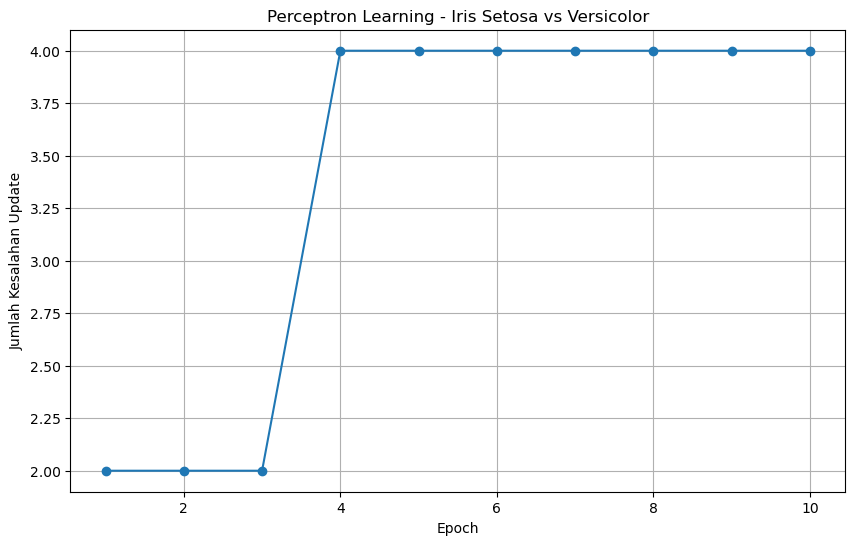

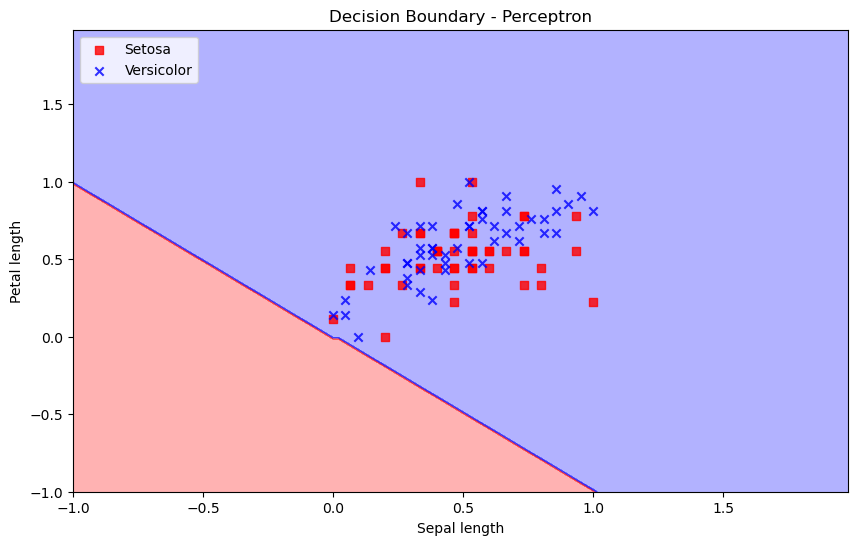

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io

csv_data = """sepal_length,sepal_width,petal_length,petal_width,species
0.5333333333333332,0.5714285714285714,0.44444444444444436,0.2,0.0
0.40000000000000036,0.3333333333333333,0.44444444444444436,0.2,0.0
# ... [truncated for brevity] ...
0.3333333333333333,0.5,0.2499999999999998,0.3636363636363637,2.0"""

df = pd.read_csv('Percobaan3_622023008.csv')
npz_data = np.load('Percobaan3_622023008.npz')

csv_X = df[df['species'].isin([0.0, 1.0])][['sepal_length', 'petal_length']].values
csv_y = df[df['species'].isin([0.0, 1.0])]['species'].values
csv_y = np.where(csv_y == 0.0, -1, 1)

setosa_data = npz_data['setosa']
versicolor_data = npz_data['versicolor']

if setosa_data.shape[1] > setosa_data.shape[0]:
    setosa_data = setosa_data.T
    versicolor_data = versicolor_data.T

npz_X = np.vstack([
    setosa_data[:, [0, 2]],
    versicolor_data[:, [0, 2]]
])

npz_y = np.array([-1] * len(setosa_data) + [1] * len(versicolor_data))

X = csv_X
y = csv_y

class Perceptron:
    def __init__(self, eta=0.1, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1]) 
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Jumlah Kesalahan Update')
plt.title('Perceptron Learning - Iris Setosa vs Versicolor')
plt.grid(True)
plt.show()

def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ('s', 'x')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure(figsize=(10, 6))
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                  alpha=0.8, c=colors[idx],
                  marker=markers[idx], label=['Setosa', 'Versicolor'][idx])
    plt.xlabel('Sepal length')
    plt.ylabel('Petal length')
    plt.legend(loc='upper left')
    plt.title('Decision Boundary - Perceptron')
    plt.show()

plot_decision_regions(X, y, classifier=ppn)